# Rational fit function used for calibration.

In [1]:
from image import load
from pathlib import Path

In [2]:
# Dosis usadas para calibración¶
imparted_doses = [0, 0.5, 1, 1.5, 2, 3, 5, 8, 10]

# Lectura de archivo para calibración¶
file_path = Path("/home/luis/Downloads") / "POS48_1.tif"  # Office PC
#file_path = Path("/home/luis/Descargas") / "POS48_1.tif" # Personal laptop
cal_image = load(file_path, for_calib = True)

## Calibration using a polynomial of degree 3

Number of images detected: 9


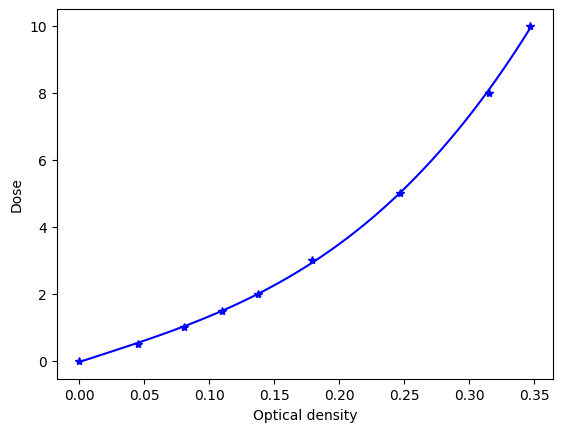

<Axes: xlabel='Optical density', ylabel='Dose'>

In [15]:
from calibration import rational_func, polynomial_g3

cal_OD = cal_image.get_calibration(doses = imparted_doses, func = "P3", channel = "B", roi = (16, 8))
cal_OD.plot(color = 'blue')

## Calibration using rational function

Number of images detected: 9


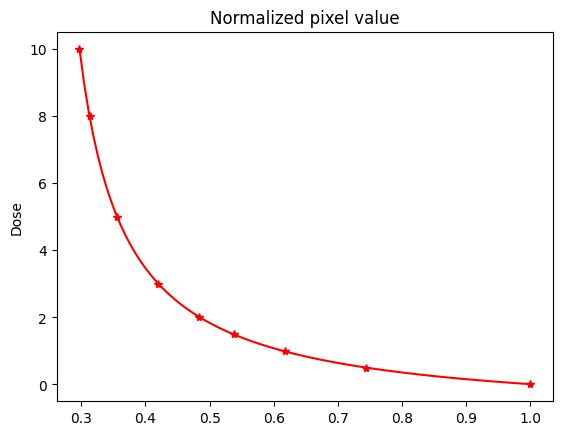

<Axes: title={'center': 'Normalized pixel value'}, ylabel='Dose'>

In [11]:
cal_RF_R = cal_image.get_calibration(doses = imparted_doses, func = "RF", channel = "R", roi = (16, 8))
cal_RF_R.plot(color = 'red')

Number of images detected: 9


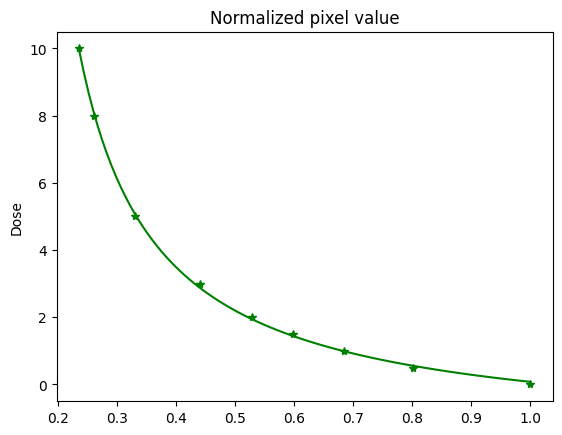

<Axes: title={'center': 'Normalized pixel value'}, ylabel='Dose'>

In [12]:
cal_RF_G = cal_image.get_calibration(doses = imparted_doses, func = "RF", channel = "G", roi = (16, 8))
cal_RF_G.plot(color = 'green')

Number of images detected: 9


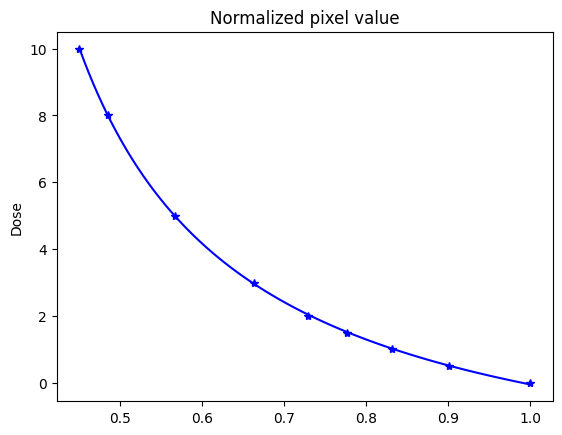

<Axes: title={'center': 'Normalized pixel value'}, ylabel='Dose'>

In [13]:
cal_RF_B = cal_image.get_calibration(doses = imparted_doses, func = "RF", channel = "B", roi = (16, 8))
cal_RF_B.plot(color = 'blue')

## Dose verification

In [14]:
#Lectura de archivo
verif_path = Path("/home/luis/Downloads") / "VERIFICACION_1.tif"  # Office PC
#verif_path = Path("/home/luis/Descargas") / "VERIFICACION_1.tif" # Personal laptop
verif = load(verif_path)

dose_img = verif.to_dose(cal_RF_R)

Number of images detected: 3


In [22]:
import numpy as np
from calibration import polynomial_g3

mean_pixel_r, _ = verif.get_stat(ch = "R", roi = (30, 10), show = False)
mean_pixel_r = sorted(mean_pixel_r, reverse = True)
mean_pixel_g, _ = verif.get_stat(ch = "G", roi = (30, 10), show = False)
mean_pixel_g = sorted(mean_pixel_g, reverse = True)
mean_pixel_b, _ = verif.get_stat(ch = "B", roi = (30, 10), show = False)
mean_pixel_b = sorted(mean_pixel_b, reverse = True)
#mean_pixel

#optical_density_r = -np.log10(np.array(mean_pixel_r)/mean_pixel_r[0])
x_r = np.array(mean_pixel_r) / mean_pixel_r[0]
x_g = np.array(mean_pixel_g) / mean_pixel_g[0]
x_b = np.array(mean_pixel_b) / mean_pixel_b[0]

dosis_from_fit_r = rational_func(x_r, *cal_RF_R.popt)
dosis_from_fit_r[dosis_from_fit_r < 0] = 0 # Remove doses < 0
dosis_from_fit_g = rational_func(x_g, *cal_RF_G.popt)
dosis_from_fit_g[dosis_from_fit_g < 0] = 0 # Remove doses < 0
dosis_from_fit_b = rational_func(x_b, *cal_RF_B.popt)
dosis_from_fit_b[dosis_from_fit_b < 0] = 0 # Remove doses < 0

print(f"Dosis en canal rojo: {dosis_from_fit_r}")
print(f"Dosis en canal verde: {dosis_from_fit_g}")
print(f"Dosis en canal azul: {dosis_from_fit_b}")

Number of images detected: 3
Number of images detected: 3
Number of images detected: 3
Dosis en canal rojo: [0.00963348 0.51529858 5.01220582]
Dosis en canal verde: [0.07911956 0.56635226 5.06235789]
Dosis en canal azul: [0.         0.52612424 4.95190513]
